In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
random.seed(0)
for dirname, _ , filenames in os.walk('/kaggle/input'):
    
    
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lish-moa/test_features.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv


In [2]:
print(filenames)

['test_features.csv', 'sample_submission.csv', 'train_features.csv', 'train_targets_scored.csv', 'train_targets_nonscored.csv']


In [3]:
train_data = pd.read_csv(os.path.join('/kaggle/input/lish-moa', 'train_features.csv'))
test_data = pd.read_csv(os.path.join('/kaggle/input/lish-moa' , 'test_features.csv'))

train_target = pd.read_csv(os.path.join('/kaggle/input/lish-moa','train_targets_scored.csv'))


In [4]:
print('train_data shape is {}'.format(train_data.shape))
print("train_target shape is {}".format(train_target.shape))

train_data shape is (23814, 876)
train_target shape is (23814, 207)


In [5]:
print("sample_train data\n")
train_data.head()

sample_train data



,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Now will do data visulatization

In [6]:
#**Now will do data visulatization**
train_data.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [7]:
import matplotlib.pyplot as plt

print("Checkig is train_data is panda data or not: {}".format((type(train_data))))

Checkig is train_data is panda data or not: <class 'pandas.core.frame.DataFrame'>


In [8]:
train_data.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [9]:
NDataRow , NDataCol = train_data.shape
print("NumberOfSample on which testing is done= {}  \nNo of Feature which are recoreded= {}".format(NDataRow,NDataCol))

NumberOfSample on which testing is done= 23814  
No of Feature which are recoreded= 876


# Visulazation of some of the features

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g-0, dtype: float64


(array([   17.,    29.,  2499., 16495.,  3325.,   592.,   423.,   252.,
          118.,    64.]),
 array([-5.513 , -3.9617, -2.4104, -0.8591,  0.6922,  2.2435,  3.7948,
         5.3461,  6.8974,  8.4487, 10.    ]),
 <a list of 10 Patch objects>)

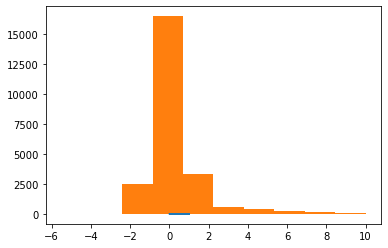

In [10]:
print(train_data['g-0'].describe())
plt.plot(np.linspace(0,1,NDataRow),train_data['g-0'])
plt.hist(train_data['g-0'])

idx = 0 val = 15
idx = 1 val = 56


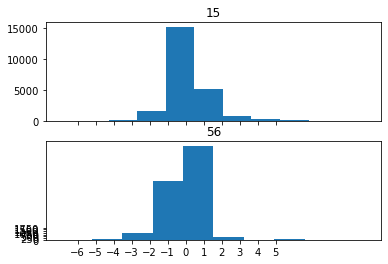

In [11]:
arr = [15,5,7,8,13,89]
arr =[15,56]
fig , ax = plt.subplots(len(arr),sharex = 'col',sharey = 'row')

for idx,val in enumerate(arr):
    ax[idx].hist(train_data[train_data.columns[val]])
    ax[idx].set_title(val)
    print("idx = {} val = {}".format(idx,val))

#plt.xlim(-6,6)
plt.xticks(np.arange(-6,6,1))
plt.yticks(range(0,2000,250))

#axis([0 inf 0 inf])
plt.show()

(array([1.1000e+01, 3.6000e+01, 1.0010e+03, 1.6112e+04, 5.9550e+03,
        4.3600e+02, 1.6700e+02, 8.3000e+01, 7.0000e+00, 6.0000e+00]),
 array([-5.998 , -4.3982, -2.7984, -1.1986,  0.4012,  2.001 ,  3.6008,
         5.2006,  6.8004,  8.4002, 10.    ]),
 <a list of 10 Patch objects>)

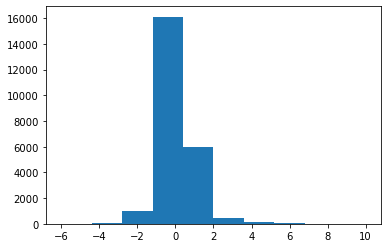

In [12]:
plt.hist(train_data[train_data.columns[7]])

## From above diagram and stasticis it , can be observed that pretty all of the feature are in range -10 to +10.
Showing that input data is well structured.

## Now we will apply randomforest on the above data.

In [13]:
train_target.head()


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#train_target.describe()
data1 = train_target.apply(pd.DataFrame.describe, axis=1)

In [15]:
print(data1)
#plt.hist(train_target['acetylcholine_receptor_agonist'])

       count  unique  top  freq
0        207       3    0   205
1        207       2    0   206
2        207       3    0   203
3        207       2    0   206
4        207       3    0   205
...      ...     ...  ...   ...
23809    207       3    0   205
23810    207       3    0   205
23811    207       2    0   206
23812    207       3    0   205
23813    207       2    0   206

[23814 rows x 4 columns]


In [60]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier 
  
#train_rf = train_data[1:,:]
 # create regressor object 
#clf = RandomForestClassifier(n_estimators = 100, random_state = 0,verbose = 5) 
clf = RandomForestClassifier(n_estimators = 50, max_depth = None , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 1) 
 
# fit the regressor with x and y data 
#regressor.fit(train_data, train_target)

In [61]:
train_rf = train_data.copy()
train_data.head()

test_rf = test_data.copy()

In [62]:
NSample = 876
NOutputSampel = 207

# A: #clf = RandomForestClassifier(n_estimators = 100, random_state = 0,verbose = 5) 
#(800,15) ==> Time to Train = 40.6min on CPU
#(800,1) ==> 1sec
#(800,5) ==> 4.7 min
#(800,10) ==> 17.8 min

#RandomForestClassifier(n_estimators = 100 , max_depth=15, random_state=0, verbose=5) + (800,5) ==> 1.8min

#clf = RandomForestClassifier(n_estimators = 40, max_depth = 20 , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20)  + (876 , 207) == 5min , train_accurray = 0.4586377760980936
#RandomForestClassifier(n_estimators = 50, max_depth = 40 , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20)  + (876,207) ==> train_time = 11.2min , train_accurray = 0.45909968925841943
#RandomForestClassifier(n_estimators = 50, max_depth = None , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 20) (876,207) ==> train_time = 16.5min, train_accurray = 0.4588897287309986

#RandomForestClassifier(n_estimators = 50, max_depth = None , random_state = 0,verbose = 5,n_jobs = -1 , min_samples_leaf = 1) + (876 , 207) ==> train_time = 163.0 min, train_accurray = 0.9834131183337532

print(train_data['cp_type'].unique())
train_rf['cp_dose'] = train_data['cp_dose'].replace({"D1":1 , "D2":2})
train_rf['cp_type'] = train_rf['cp_type'].replace({"trt_cp":1 , "ctl_vehicle":2})

test_rf['cp_dose'] = test_data['cp_dose'].replace({"D1":1 , "D2":2})
test_rf['cp_type'] = test_data['cp_type'].replace({"trt_cp":1 , "ctl_vehicle":2})

train_rf = train_rf.iloc[:,1:NSample]
test_rf = test_rf.iloc[:,1:NSample]
#iloc for array like slicing of panda dataframe

train_rf.head()

['trt_cp' 'ctl_vehicle']


,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,1,24,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,1,72,1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,1,48,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,1,48,1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,1,72,2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [63]:
train_rf_array = train_rf.to_numpy()
#train_target.head()
train_target_rf_arr = train_target.iloc[: , 1:NOutputSampel].to_numpy()

#print(train_rf_array[0])
#print(train_target_rf_arr[23])

print("train: {}".format(train_rf.shape))
print("target: {}".format(train_target_rf_arr.shape))

train: (23814, 875)
target: (23814, 206)


In [64]:
#https://stackoverflow.com/questions/22443041/predicting-how-long-an-scikit-learn-classification-will-take-to-run
clf.fit(train_rf_array, train_target_rf_arr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 34.9min


building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 163.0min finished


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0, verbose=5)

In [65]:
print("Traing Done")

Traing Done


In [66]:
#visualize_classifier(clf, train_rf_array, train_target_rf_arr)
ans = clf.predict( train_rf_array)
print("Shape of test_rf is = {}, shape of ans is {} \nshape of target is: {}".format(test_rf.shape,ans.shape , train_target_rf_arr.shape))
print("type of ans is {}\n".format(type(ans)))
print("\n")

print(sum(ans))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s


Shape of test_rf is = (3982, 875), shape of ans is (23814, 206) 
shape of target is: (23814, 206)
type of ans is <class 'numpy.ndarray'>



[ 15  18  24 184 293  72  53  91  12 256 342  65   7  41  12  12  44  85
  75  36  36  72   6  41  11  13  12  18  70  34  21  46  46   5   1  11
  93  19  95   6  58  79  33 188  87 111   7  29  36  67  23  66  27   6
 272  40  54  33  36  17  12  97  16 336  52  24  42  47  52   6  36 420
 102  35  24   5  46 389 117 408 334   6   1 148  46  34  18  25  49 275
  17  18  23 103 155  55 265  13  70 360  17  60  68 105  57 238  24  31
  70 281  91  35  29  27  72  28  50  41  89 270   6   5  59  11  59   6
  31  71  73  25  11  84  18 129  48  36 830   4  24  11  26   5  17  55
  91  36  61  23  60 295  18 259  22 150  30  52  97 113  27 113  18  33
  79 726  48   6 101  19  50 222  11  66   5  34  36  24 228 393  42  34
  36  23 258  24  69   6  18  57  30  17  36  27   4  35 126  15   6  25
  47 313  71   5 168  25  36  30]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    8.8s finished


In [67]:
clf.score(train_rf_array, train_target_rf_arr)
#test_rf_array , 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    9.0s finished


0.9834131183337532